# Multiple Linear Regression
# MOHAMMAD KUMAIL

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split

In [2]:
my_data = pd.read_csv('petrol_consumption.csv')
my_frame = pd.DataFrame(my_data)

my_frame.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


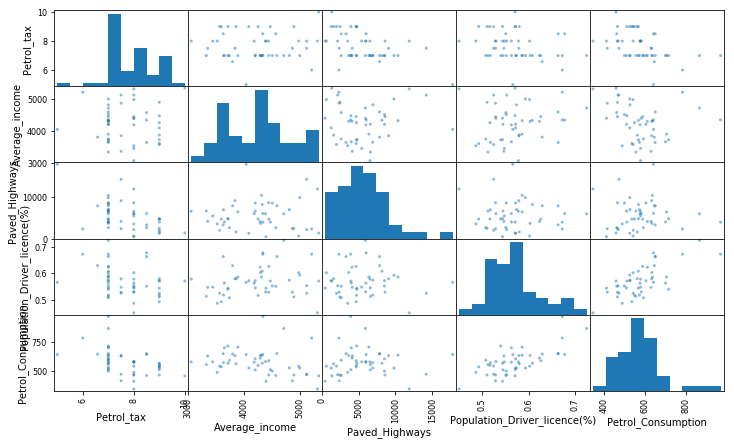

In [3]:
#fig = plt.figure( figsize = (12, 5) )
pd.plotting.scatter_matrix(my_frame, figsize = (12, 7))
plt.show()

In [4]:
my_frame.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


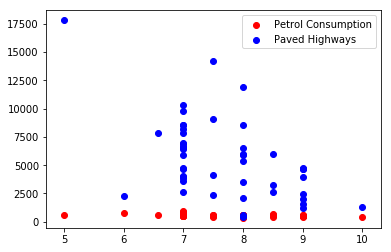

In [5]:
plt.scatter(my_frame.Petrol_tax, my_frame.Petrol_Consumption, color = 'red')
plt.scatter(my_frame.Petrol_tax, my_frame.Paved_Highways, color = 'blue')

plt.legend(['Petrol Consumption', 'Paved Highways'])
plt.show()

In [6]:
x = my_frame[my_frame.columns[0:4]].values
y = my_frame['Petrol_Consumption'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [8]:
mul_reg = linear_model.LinearRegression()

In [9]:
mul_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_predict = mul_reg.predict(x_test)

In [24]:
my_frame1 = pd.DataFrame({'Actual': y_test, 'Predicted Value': y_predict})
prediction_frame = my_frame1

prediction_frame

,Actual,Predicted Value
0,467,513.096702
1,577,577.813982
2,610,687.382367
3,344,308.443151
4,640,693.136114
5,635,602.170080
6,704,643.822062
7,649,710.653006
8,534,454.654363
9,541,515.384018


<Figure size 864x360 with 0 Axes>

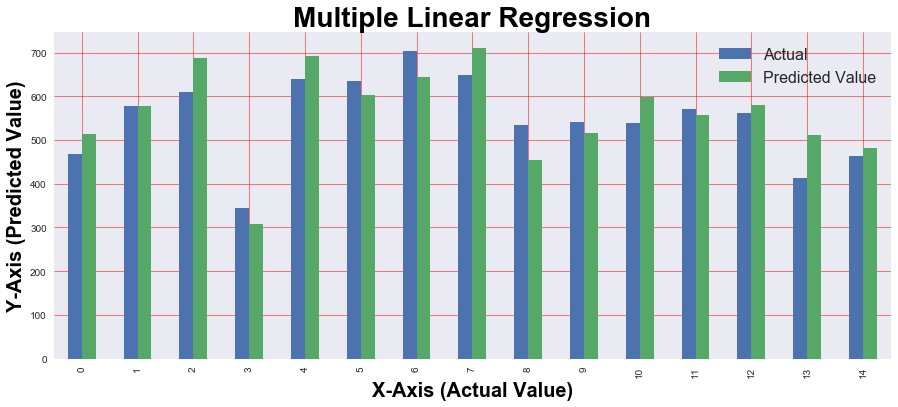

In [26]:
plt.style.use('seaborn')

fig = plt.figure( figsize = (12, 5) )

prediction_frame.plot(kind = 'bar', figsize = (15, 6))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'red')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')

plt.title('Multiple Linear Regression', fontsize = 28, fontweight = 'bold', color = 'black')
plt.xlabel('X-Axis (Actual Value)', fontsize = 20, fontweight = 'bold', color = 'black' )
plt.ylabel('Y-Axis (Predicted Value)', fontsize = 20, fontweight = 'bold', color = 'black' )

plt.legend(fontsize = 16)
plt.show()

In [27]:
print("Performance of Linear regressor:")
print("Mean absolute error =", skm.mean_absolute_error(y_test, y_predict))
print("Mean squared error =", round(skm.mean_squared_error(y_test, y_predict), 2))
print("R2 score =", round(skm.r2_score(y_test, y_predict), 2))

Performance of Linear regressor:
Mean absolute error = 45.34769387601916
Mean squared error = 2760.51
R2 score = 0.68
